###  **Chains** 

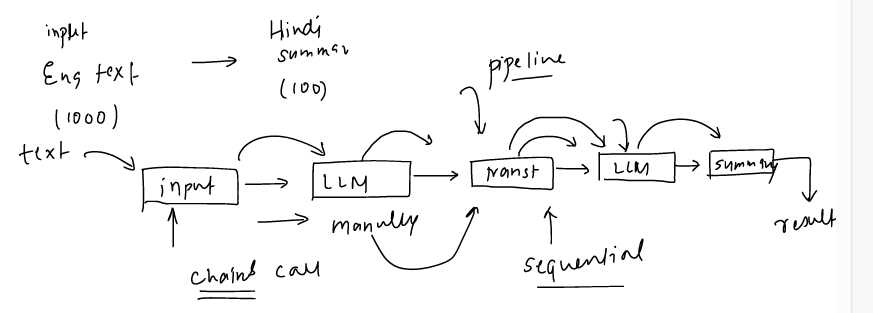

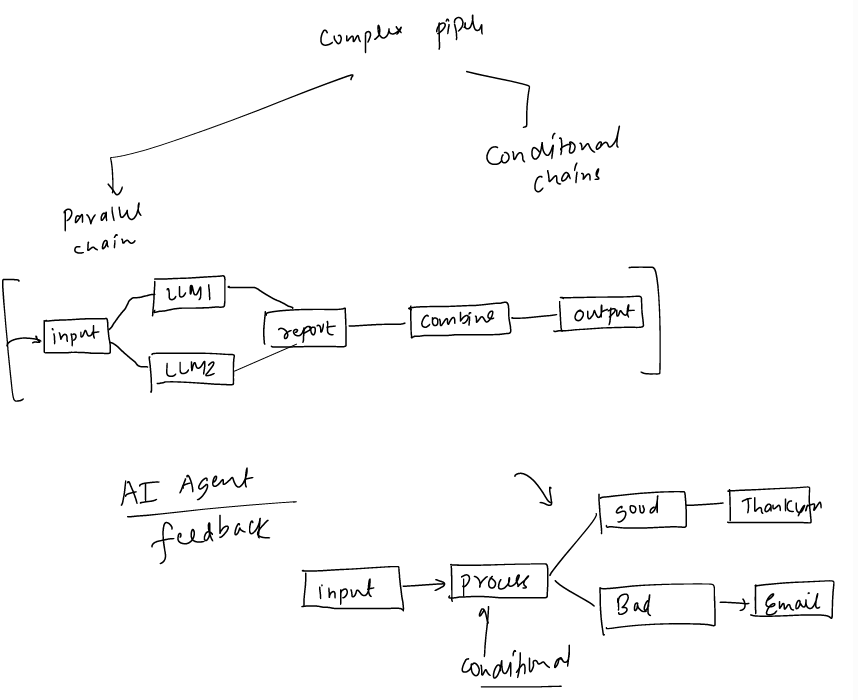

### 🔗 What Are **Chains** in LangChain?

In **LangChain**, a **Chain** is a sequence of steps (components) where:

- Output of one step becomes the input of the next.
- These steps can include prompts, LLMs, tools, retrievers, or memory.

> Think of a Chain like a pipeline or flowchart, where multiple building blocks are connected together to solve a complex task.
> 

---

## 🔹 Why Use Chains?

Raw LLM calls are powerful, but chains allow you to:

- Add **logic** and **structure** to your AI app.
- Combine multiple steps like input → prompt → LLM → output.
- Easily extend to complex tasks like **RAG**, **agents**, **chatbots**, and **multi-modal** apps.

---

## 🧱 Basic Building Blocks of a Chain

| Component | Role |
| --- | --- |
| `PromptTemplate` | Formats the user input |
| `LLM` / `ChatModel` | Generates the response using the prompt |
| `OutputParser` | (Optional) Cleans or processes the raw LLM output |
| `Memory` | (Optional) Stores conversation history for context |

---

## ✅ Example: Simple LLM Chain

```python
python
CopyEdit
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain

# 1. Define prompt template
prompt = PromptTemplate(
    input_variables=["topic"],
    template="Explain {topic} in simple terms."
)

# 2. Choose the LLM
llm = OpenAI()

# 3. Create a chain
chain = LLMChain(llm=llm, prompt=prompt)

# 4. Run the chain
response = chain.run("quantum physics")
print(response)

```

✅ This is a **single-step chain**, but you can combine many steps too.

---

## 🔄 Types of Chains in LangChain

### 1. **LLMChain**

- Most basic chain: `PromptTemplate + LLM`

### 2. **SimpleSequentialChain**

- Output of one chain → input of the next

```python
python
CopyEdit
from langchain.chains import SimpleSequentialChain

```

### 3. **SequentialChain**

- Allows **multiple input/output variables** and more control

### 4. **ConversationChain**

- Adds **memory** to keep track of conversation history

### 5. **RetrievalQA / RAG Chains**

- Combine **vector DB retriever + LLM** for question answering on your documents

---

## 🔁 Example: Sequential Chain

```python
python
CopyEdit
from langchain.chains import SequentialChain

# Chain 1: Generate an idea
idea_chain = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Give me a startup idea about {field}"))

# Chain 2: Turn that idea into a pitch
pitch_chain = LLMChain(llm=llm, prompt=PromptTemplate.from_template("Write a 2-sentence pitch for: {idea}"))

# Build Sequential Chain
chain = SequentialChain(
    chains=[idea_chain, pitch_chain],
    input_variables=["field"],
    output_variables=["idea", "text"]
)

output = chain.run(field="AI in education")
print(output)

```

---

## 🧠 Summary

| Concept | Explanation |
| --- | --- |
| Chain | A pipeline that connects steps for a task |
| LLMChain | A basic chain: prompt → LLM |
| SequentialChain | Multiple chains in sequence |
| ConversationChain | Adds memory to the conversation |
| Custom Chain | You can write your own using Python logic |